In [ ]:
import pandas
data = pandas.read_csv('BostonHousing.csv')
print("Shape of the dataset:",data.shape)
print("Features:\n",data.columns.values)
print("Target Variable:\n",data['medv'].describe())
df = pandas.DataFrame(data)
print(df)

Shape of the dataset: (506, 14)
Features:
 ['crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'ptratio'
 'b' 'lstat' 'medv']
Target Variable:
 count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64
        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
5

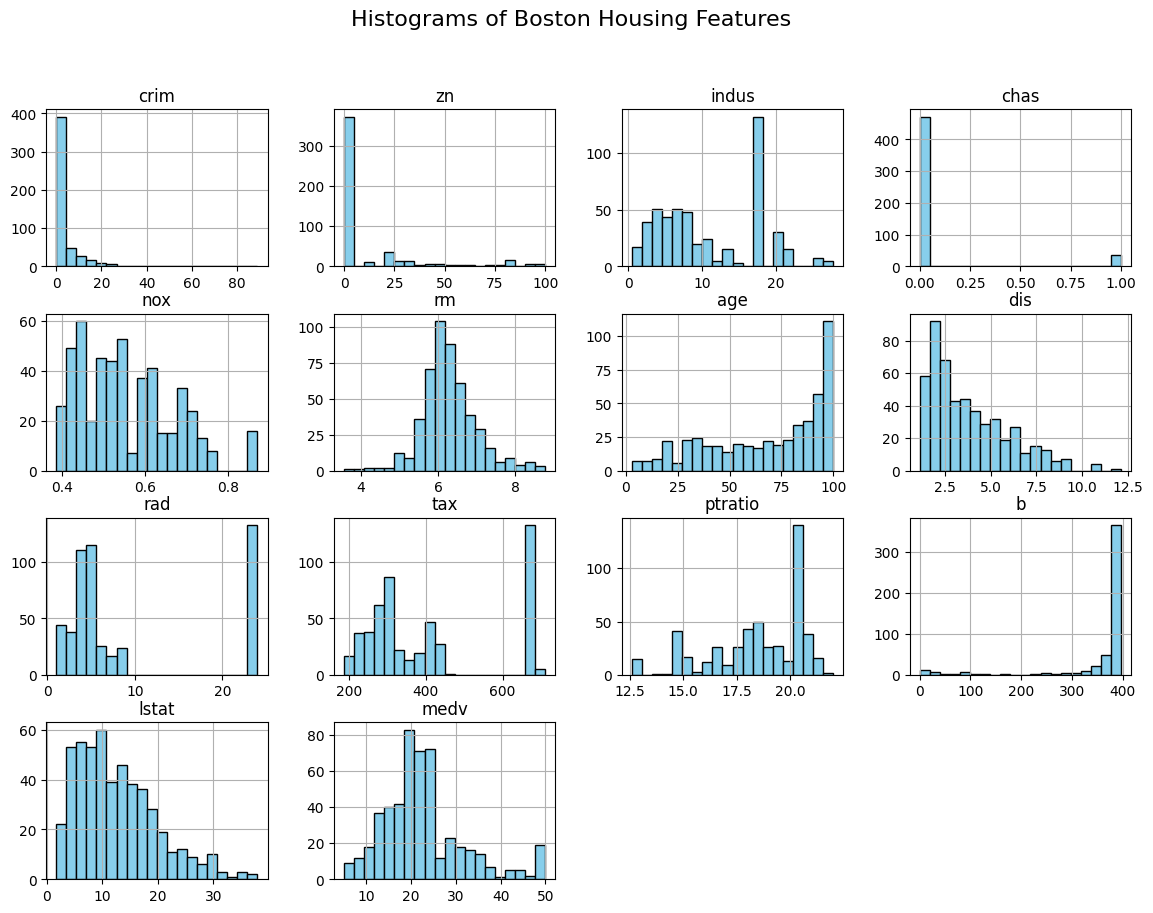

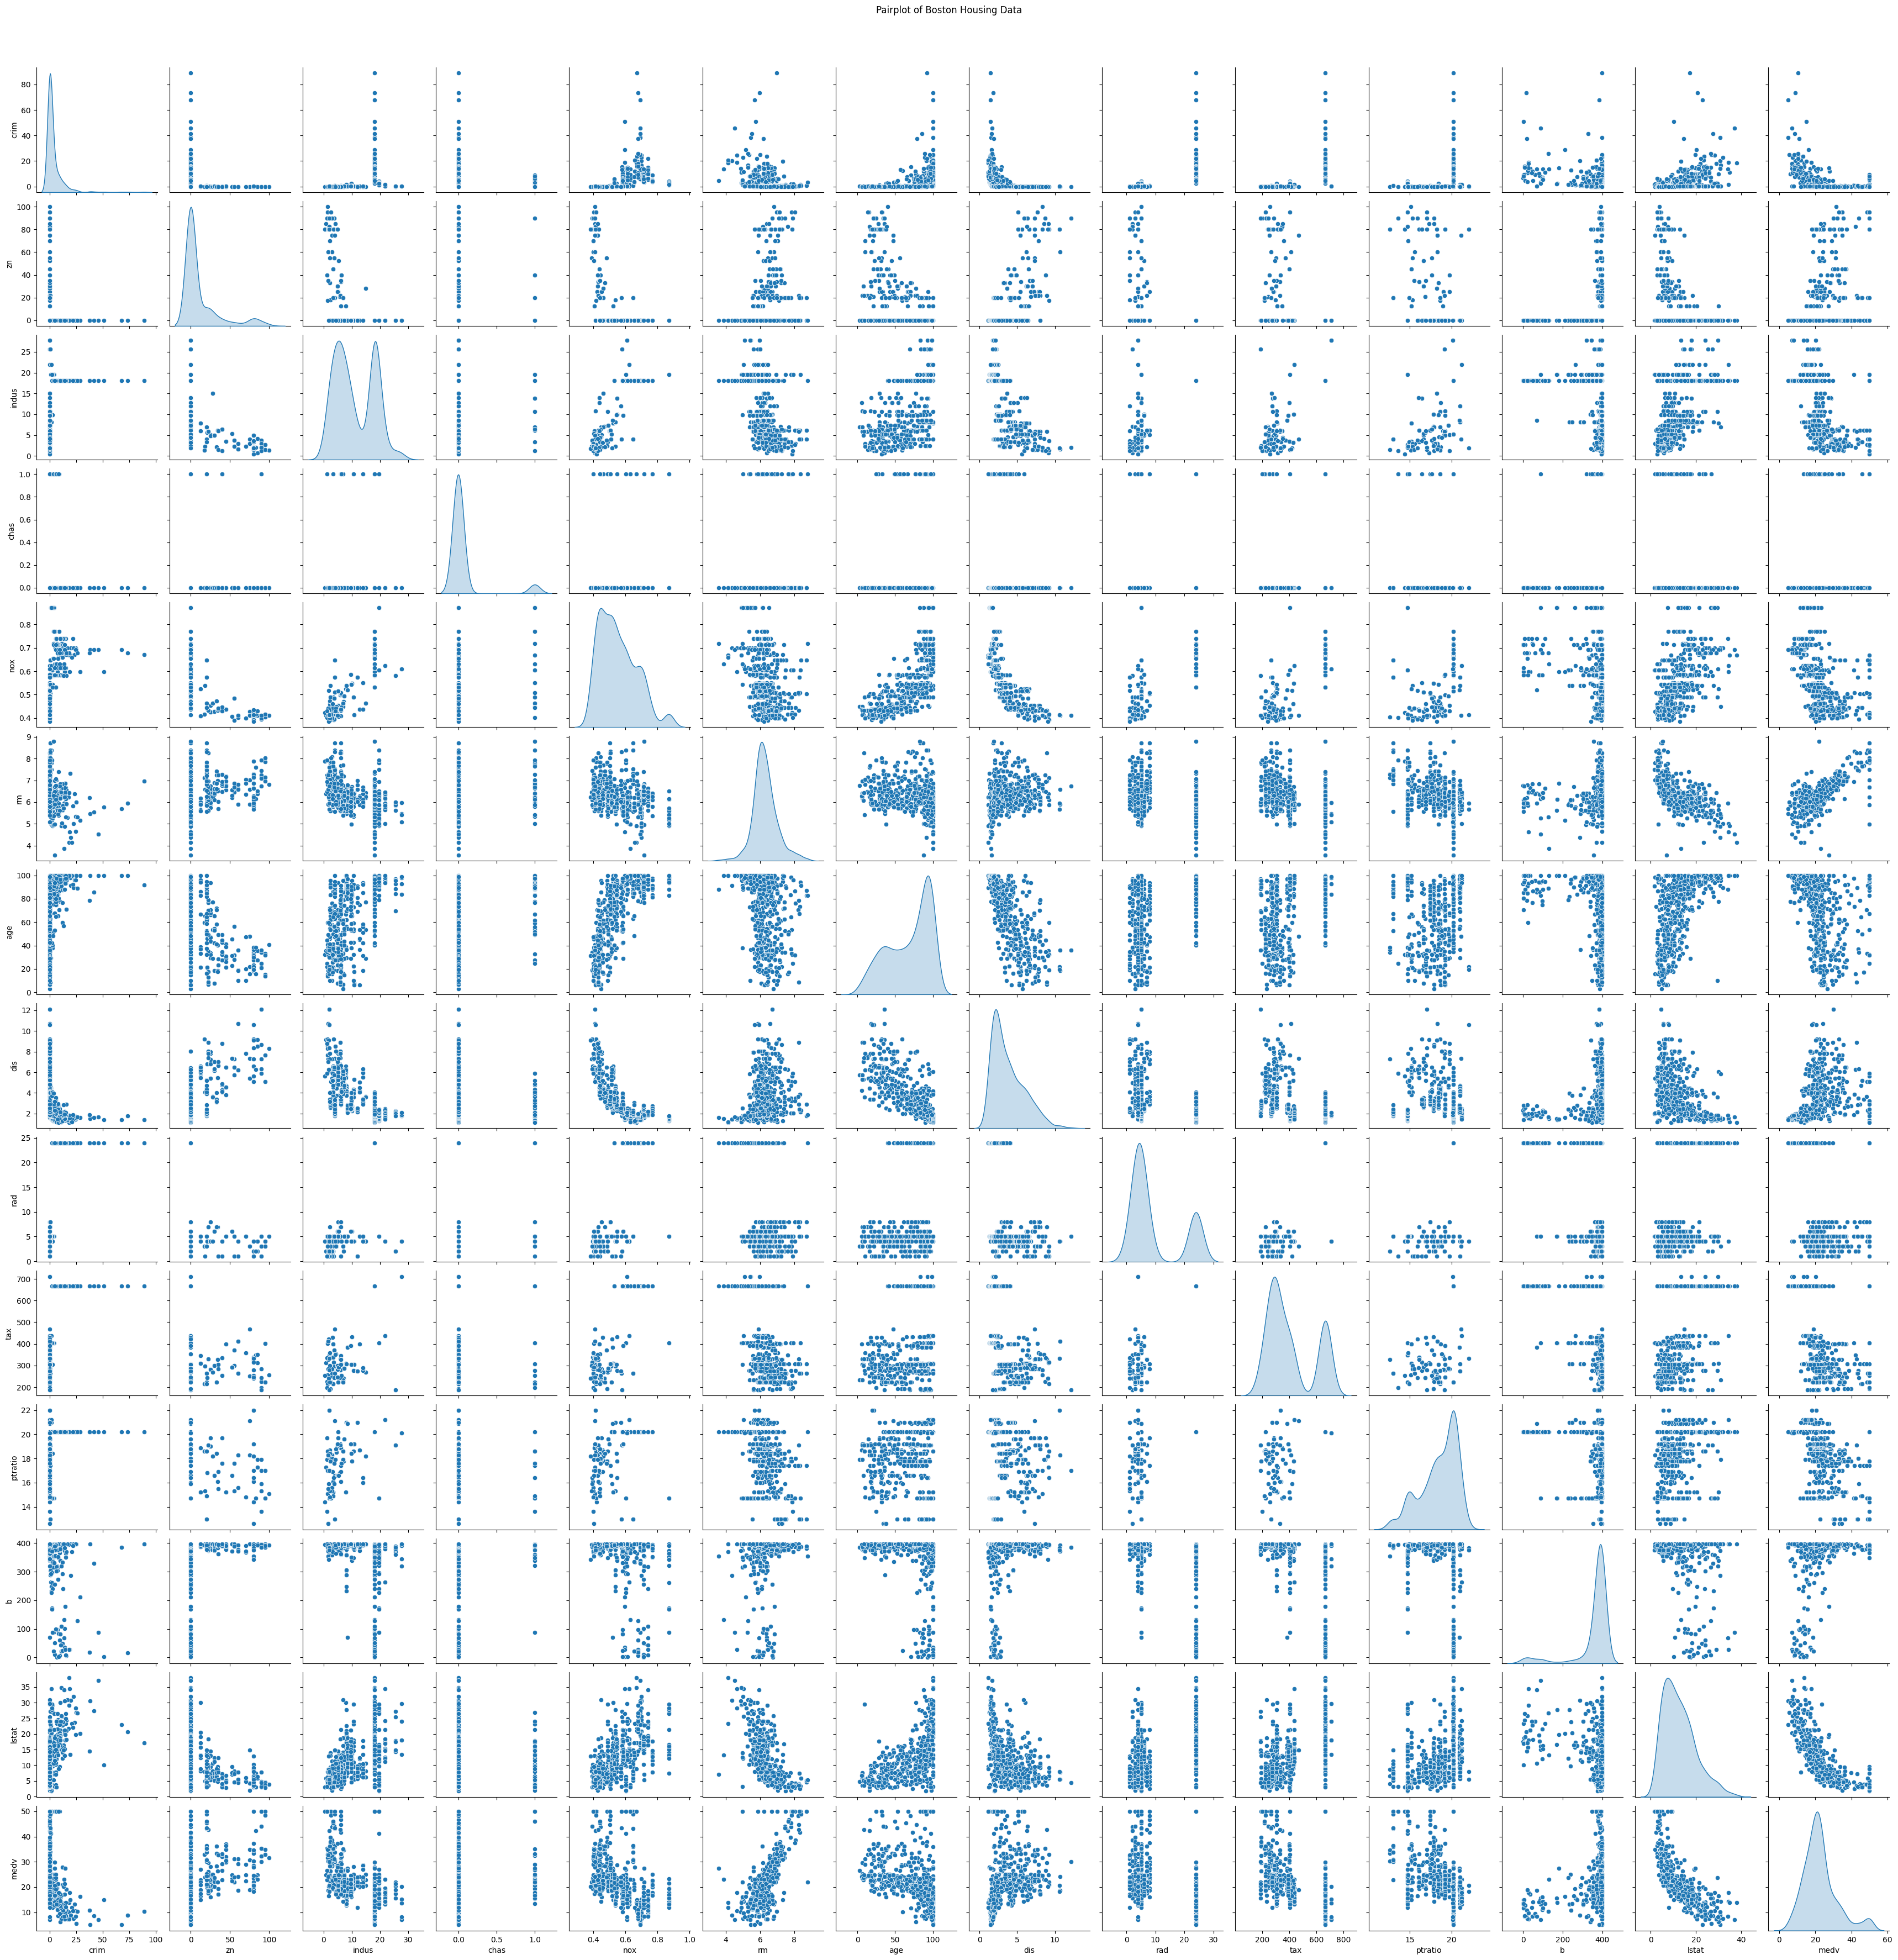

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219433  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311173 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.394193  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091468  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302751  0.731470   
rm      -0.219433  0.311173 -0.394193  0.091468 -0.302751  1.000000 -0.240286   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240286  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.203507 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.210718  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292794  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.357612  0.261515   
b       -0.385064  0.175520 

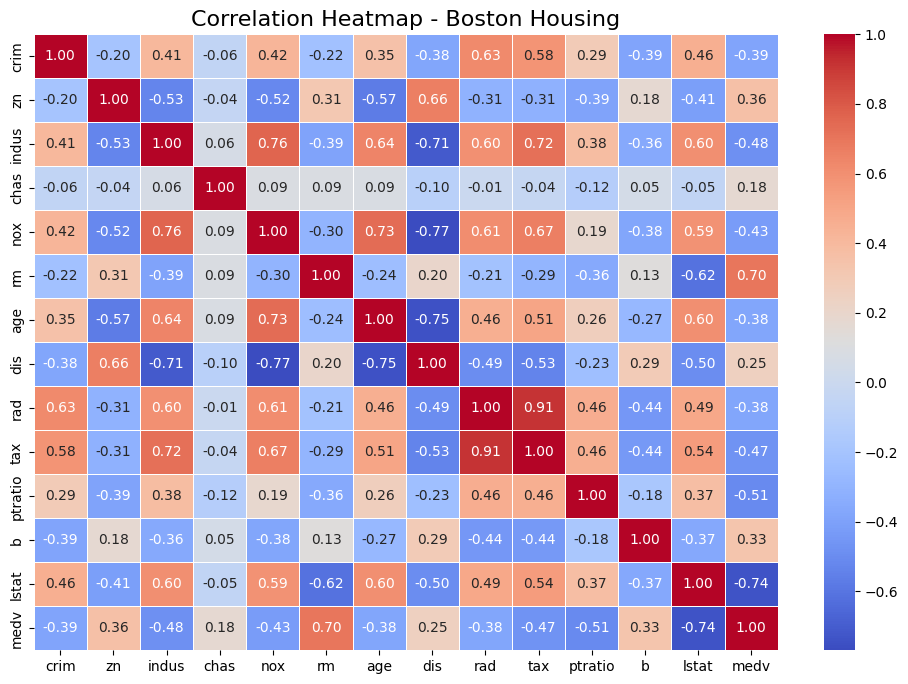

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("BostonHousing.csv")
#Histograms
df.hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Boston Housing Features", fontsize=16)
plt.show()
#Pairplot
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot of Boston Housing Data", y=1.02)
plt.show()
#Correlation Matrix
corr_matrix = df.corr(numeric_only=True)  # numeric only in case of categorical columns
#Heatmap Visualization
print(corr_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Boston Housing", fontsize=16)
plt.show()


Mean Squared Error: 43.60
R² Score: 0.48


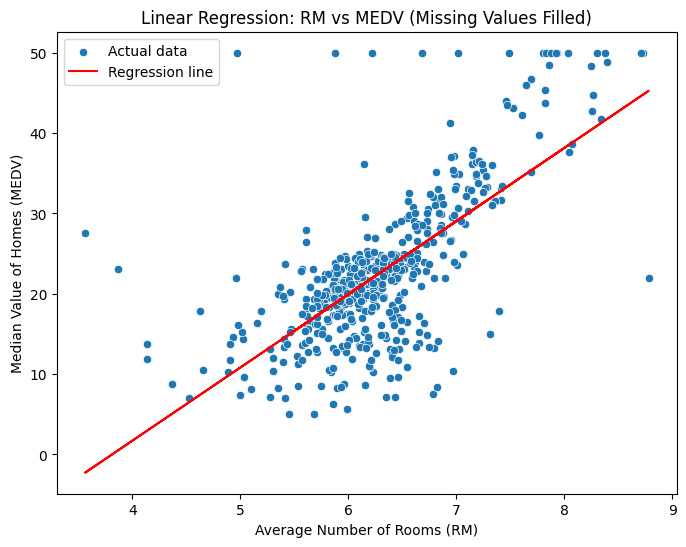

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("BostonHousing.csv")

# Impute missing RM values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df[['rm']])  # This returns a NumPy array
y = df['medv']

# Create and fit model

model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Evaluate
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['rm'], y=y, label="Actual data")
plt.plot(df['rm'], y_pred, color='red', label="Regression line")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median Value of Homes (MEDV)")
plt.title("Linear Regression: RM vs MEDV (Missing Values Filled)")
plt.legend()
plt.show()


In [ ]:
# Exercise 4: Multiple Linear Regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load dataset
df = pd.read_csv("BostonHousing.csv")

# 2. Features and target
X = df.drop(columns=['medv'])  # predictors
y = df['medv']                  # target

# 3. Handle missing values (mean imputation)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 4. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 5. Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predictions
y_pred = model.predict(X_test)

# 7. Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 8. Results
print("Multiple Linear Regression Performance:")
print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.2f}")


Multiple Linear Regression Performance:
MAE : 3.21
MSE : 24.40
RMSE: 4.94
R²  : 0.67


In [ ]:
# Exercise 5: Model Evaluation and Interpretation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load dataset
df = pd.read_csv("BostonHousing.csv")

# 2. Features & target
X = df.drop(columns=['medv'])
y = df['medv']

# 3. Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# 5. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predictions on test data
y_pred = model.predict(X_test)

# 7. Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation on Test Data:")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")

# 8. Interpretation of coefficients
coefficients = pd.DataFrame({
    'Feature': df.drop(columns=['medv']).columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients (sorted):")
print(coefficients)


Model Evaluation on Test Data:
MSE  : 24.40
RMSE : 4.94
R²   : 0.67

Feature Coefficients (sorted):
    Feature  Coefficient
5        rm     4.429193
3      chas     2.787586
8       rad     0.262753
2     indus     0.041726
1        zn     0.030209
11        b     0.012349
6       age    -0.006109
9       tax    -0.010647
0      crim    -0.113051
12    lstat    -0.508973
10  ptratio    -0.918081
7       dis    -1.442141
4       nox   -17.188929


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("Downloads/heart.csv")

X = df['age'].values
x = X.reshape(-1,1)
y = df['fbs'].values
y = y.ravel()

# Unregularized Logistic Regression
log_reg = linear_model.LogisticRegression()
log_reg.fit(x,y)

# L1 Regularized Logistic Regression
log_reg1 = linear_model.LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
log_reg1.fit(x,y)

# ElasticNet Regularized Logistic Regression
# ElasticNet requires the 'saga' solver and an l1_ratio
log_reg_elasticnet = linear_model.LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=42)
log_reg_elasticnet.fit(x, y)


X_test = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)

# Predicted probabilities for the unregularized model
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Predicted probabilities for the L1 regularized model
y_prob_l1 = log_reg1.predict_proba(X_test)[:, 1]

# Predicted probabilities for the ElasticNet regularized model
y_prob_elasticnet = log_reg_elasticnet.predict_proba(X_test)[:, 1]


plt.figure(figsize=(8, 6))
sns.scatterplot(x=x.flatten(), y=y, label='Data')

# Plot the unregularized logistic function
plt.plot(X_test, y_prob, color='red', linewidth=2, label='Unregularized Logistic Function')

# Plot the L1 regularized logistic function
plt.plot(X_test, y_prob_l1, color='green', linewidth=2, label='L1 Regularized Logistic Function')

# Plot the ElasticNet regularized logistic function
plt.plot(X_test, y_prob_elasticnet, color='purple', linewidth=2, label='ElasticNet Regularized Logistic Function')


plt.xlabel("Age")
plt.ylabel("Fasting Blood Sugar")
plt.title("Age vs. Fasting Blood Sugar with Logistic Regression")
plt.legend()
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving BostonHousing.csv to BostonHousing.csv


In [ ]:
# @title
from google.colab import files, drive
import shutil

# Upload
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Get uploaded file name

# Mount Drive
drive.mount('/content/drive')

# Save in Drive with fixed name
drive_path = "/content/drive/MyDrive/BostonHousing.csv"
shutil.copy(filename, drive_path)

print(f"File saved permanently in Drive as {drive_path}")


In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Copy file from Drive to current working directory
shutil.copy("/content/drive/MyDrive/BostonHousing.csv", "BostonHousing.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'BostonHousing.csv'